# Projekt - 2. část

Cíle 2. části projektu jsou:
* provedení explorativní analýzy na zvolené datové sadě
* úpravu datové sady do podoby vhodné pro dolování

## 1. Úkol
### Zadání: 
Z dostupných datových sad si zvolte jednu datovou sadu, kterou se budete dále zabývat. Stáhněte si zvolenou datovou sadu z uvedeného zdroje a prostudujte si dostupné informace k této datové sadě.

### Řešení: 
Vybraná datová sada Most Streamed Spotify Songs 2023 – dostupná zde: [https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [94]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [95]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

## 2. Úkol
### Zadání: 
Proveďte explorativní analýzu zvolené datové sady. Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
1. prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
2. prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.
3. zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.
4. proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.
5. proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

### Řešení:

#### 1. Podúkol:
Prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

Analýza jednotlivých atributů jako celku:

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [97]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [98]:
df.describe(include = [object])

track_name artist(s)_name    streams in_deezer_playlists  \
count         953            953        953                 953   
unique        943            645        949                 348   
top      Daylight   Taylor Swift  723894473                   0   
freq            2             34          2                  24   

       in_shazam_charts  key   mode  
count               903  858    953  
unique              198   11      2  
top                   0   C#  Major  
freq                344  120    550

Analýza vybraných kategorických atributů:

In [99]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

In [100]:
# Zobrazení názvu skladeb, které se ve sloupci 'track_name' nacházejí více než jednou
df['track_name'].value_counts()

track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64

In [101]:
# Filtrace pouze těch skupin, které mají více než jednoho interpreta
grouped = df.groupby('track_name')['artist(s)_name'].apply(list).reset_index()
grouped[grouped['artist(s)_name'].str.len() > 1]

track_name  \
22                          About Damn Time   
192                                Daylight   
200                             Die For You   
277                                 Flowers   
425  Let It Snow! Let It Snow! Let It Snow!   
503                                Miss You   
550                                    Numb   
656                                    SNAP   
660                        SPIT IN MY FACE!   
783                          Take My Breath   

                                       artist(s)_name  
22                                     [Lizzo, Lizzo]  
192                     [David Kushner, Harry Styles]  
200                                [The Weeknd, Joji]  
277               [Miley Cyrus, Lauren Spencer Smith]  
425  [Dean Martin, Frank Sinatra, B. Swanson Quartet]  
503            [Robin Schulz, Oliver Tree, Southstar]  
550                 [Linkin Park, Marshmello, Khalid]  
656                            [Rosa Linn, Rosa Linn]  
660                              [ThxSoMch, ThxSoMch]  
783                          [The Weeknd, The Weeknd]

In [102]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [103]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

Z dat výše bylo zjištěno, že se některé sloupce chovají jako objekt, přestože obsahují číselná data, tudíž data budou upravena na numerické atributy. Některé atributy jsou rovněž neintuitivně pojmenovány a budou přejmenovány.

In [104]:
attributes_to_numeric = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

for attribute in attributes_to_numeric:
    df[attribute] = df[attribute].str.replace(',', '').apply(pd.to_numeric, errors='ignore')
    df[attribute] = pd.to_numeric(df[attribute], errors='coerce')
    
df[attributes_to_numeric].dtypes

streams                float64
in_deezer_playlists      int64
in_shazam_charts       float64
dtype: object

#### 2. Podúkol

Prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.

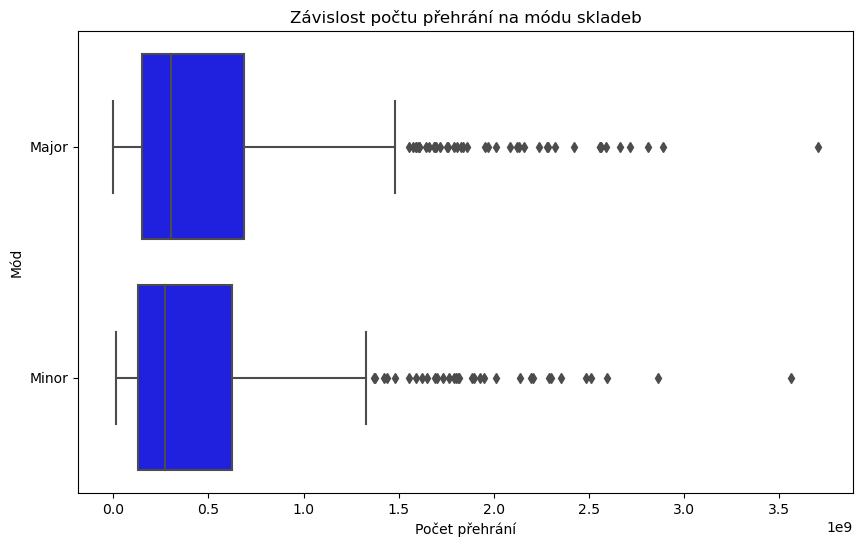

In [105]:
# Vytvoření grafu zobrazujícího závislost 'streams' na 'mode'
plt.figure(figsize=(10, 6))
sns.boxplot(y='mode', x='streams', data=df, color='blue')
plt.title('Závislost počtu přehrání na módu skladeb')
plt.ylabel('Mód')
plt.xlabel('Počet přehrání')
plt.show()

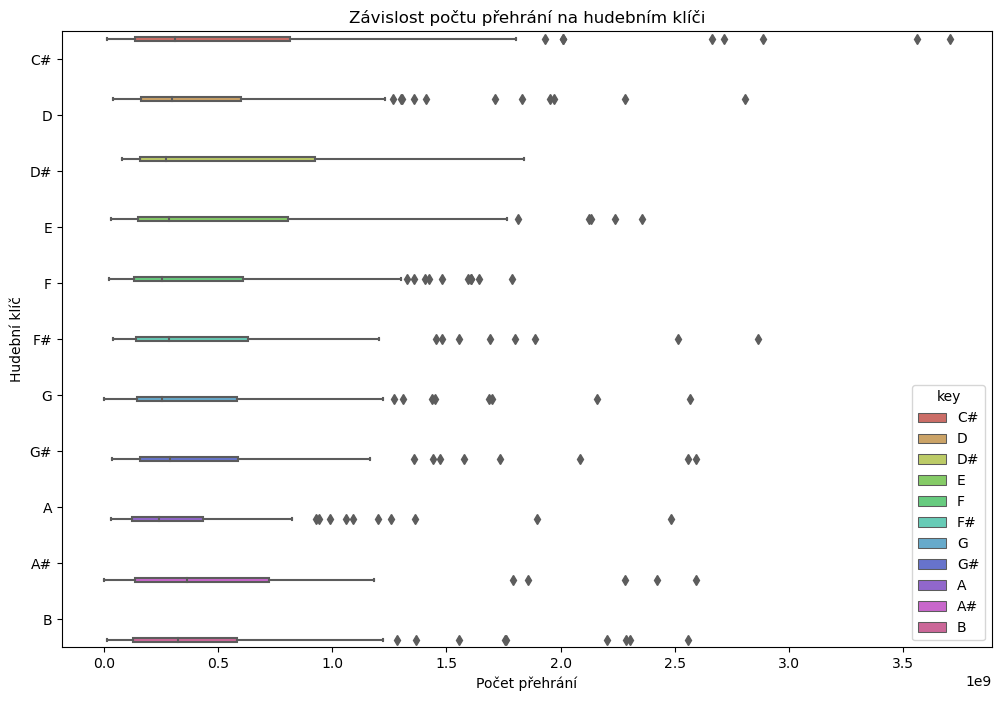

In [106]:
# Definování pořadí hudebních klíčů
keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Získání unikátních klíčů z dat
unique_keys = df['key'].unique()

# Seřazení unikátních klíčů podle hudební stupnice
ordered_keys = [key for key in keys if key in unique_keys]

# Vytvoření palety barev
palette = sns.color_palette("hls", len(ordered_keys))

plt.figure(figsize=(12, 8))
sns.boxplot(y="key", x="streams", data=df, order=ordered_keys, palette=palette, hue='key', hue_order=ordered_keys)
plt.xlabel("Počet přehrání")
plt.ylabel("Hudební klíč")
plt.title("Závislost počtu přehrání na hudebním klíči")
plt.show()

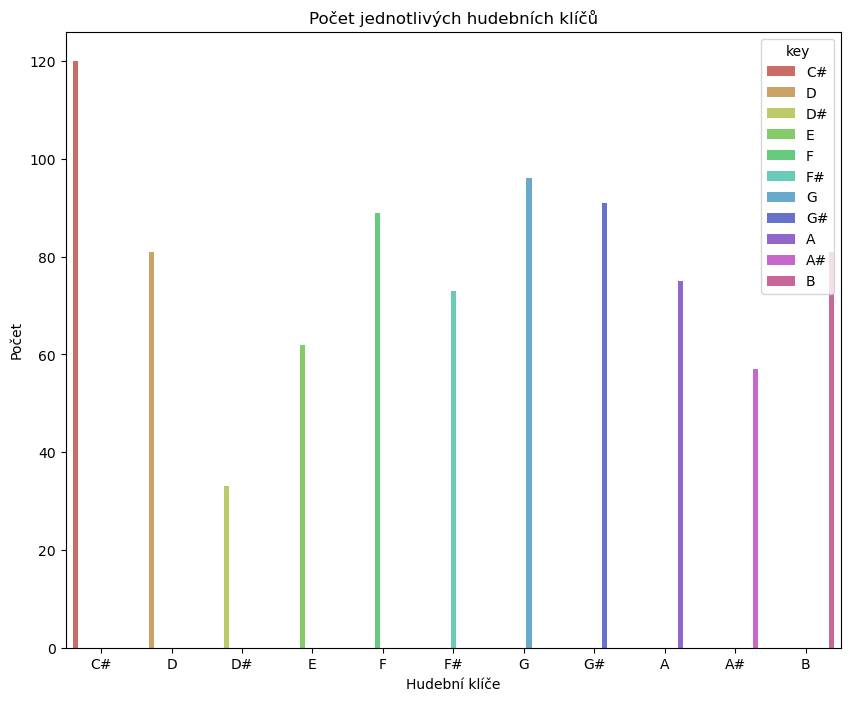

In [107]:
plt.figure(figsize=(10, 8))
sns.countplot(x="key", data=df, order=ordered_keys, palette=palette, hue='key', hue_order=ordered_keys)
plt.xlabel("Hudební klíče")
plt.ylabel("Počet")
plt.title("Počet jednotlivých hudebních klíčů")
plt.show()

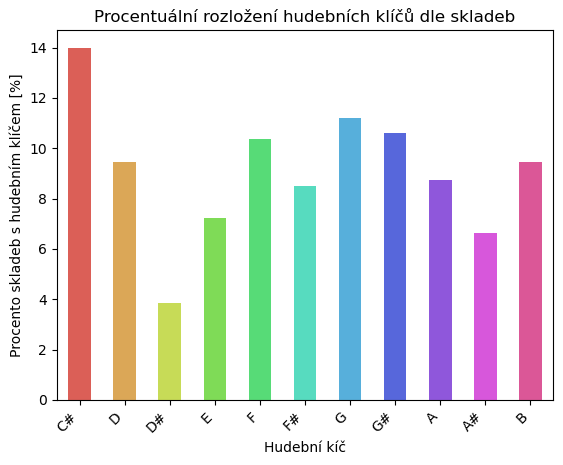

In [108]:
key_counts = df['key'].value_counts(normalize=True) * 100

ordered_key_counts = key_counts.reindex(ordered_keys)

ordered_key_counts.plot(kind='bar', color=palette)
plt.title('Procentuální rozložení hudebních klíčů dle skladeb')
plt.ylabel('Procento skladeb s hudebním klíčem [%]')
plt.xlabel('Hudební kíč')
plt.xticks(rotation=45, ha='right')
plt.show()

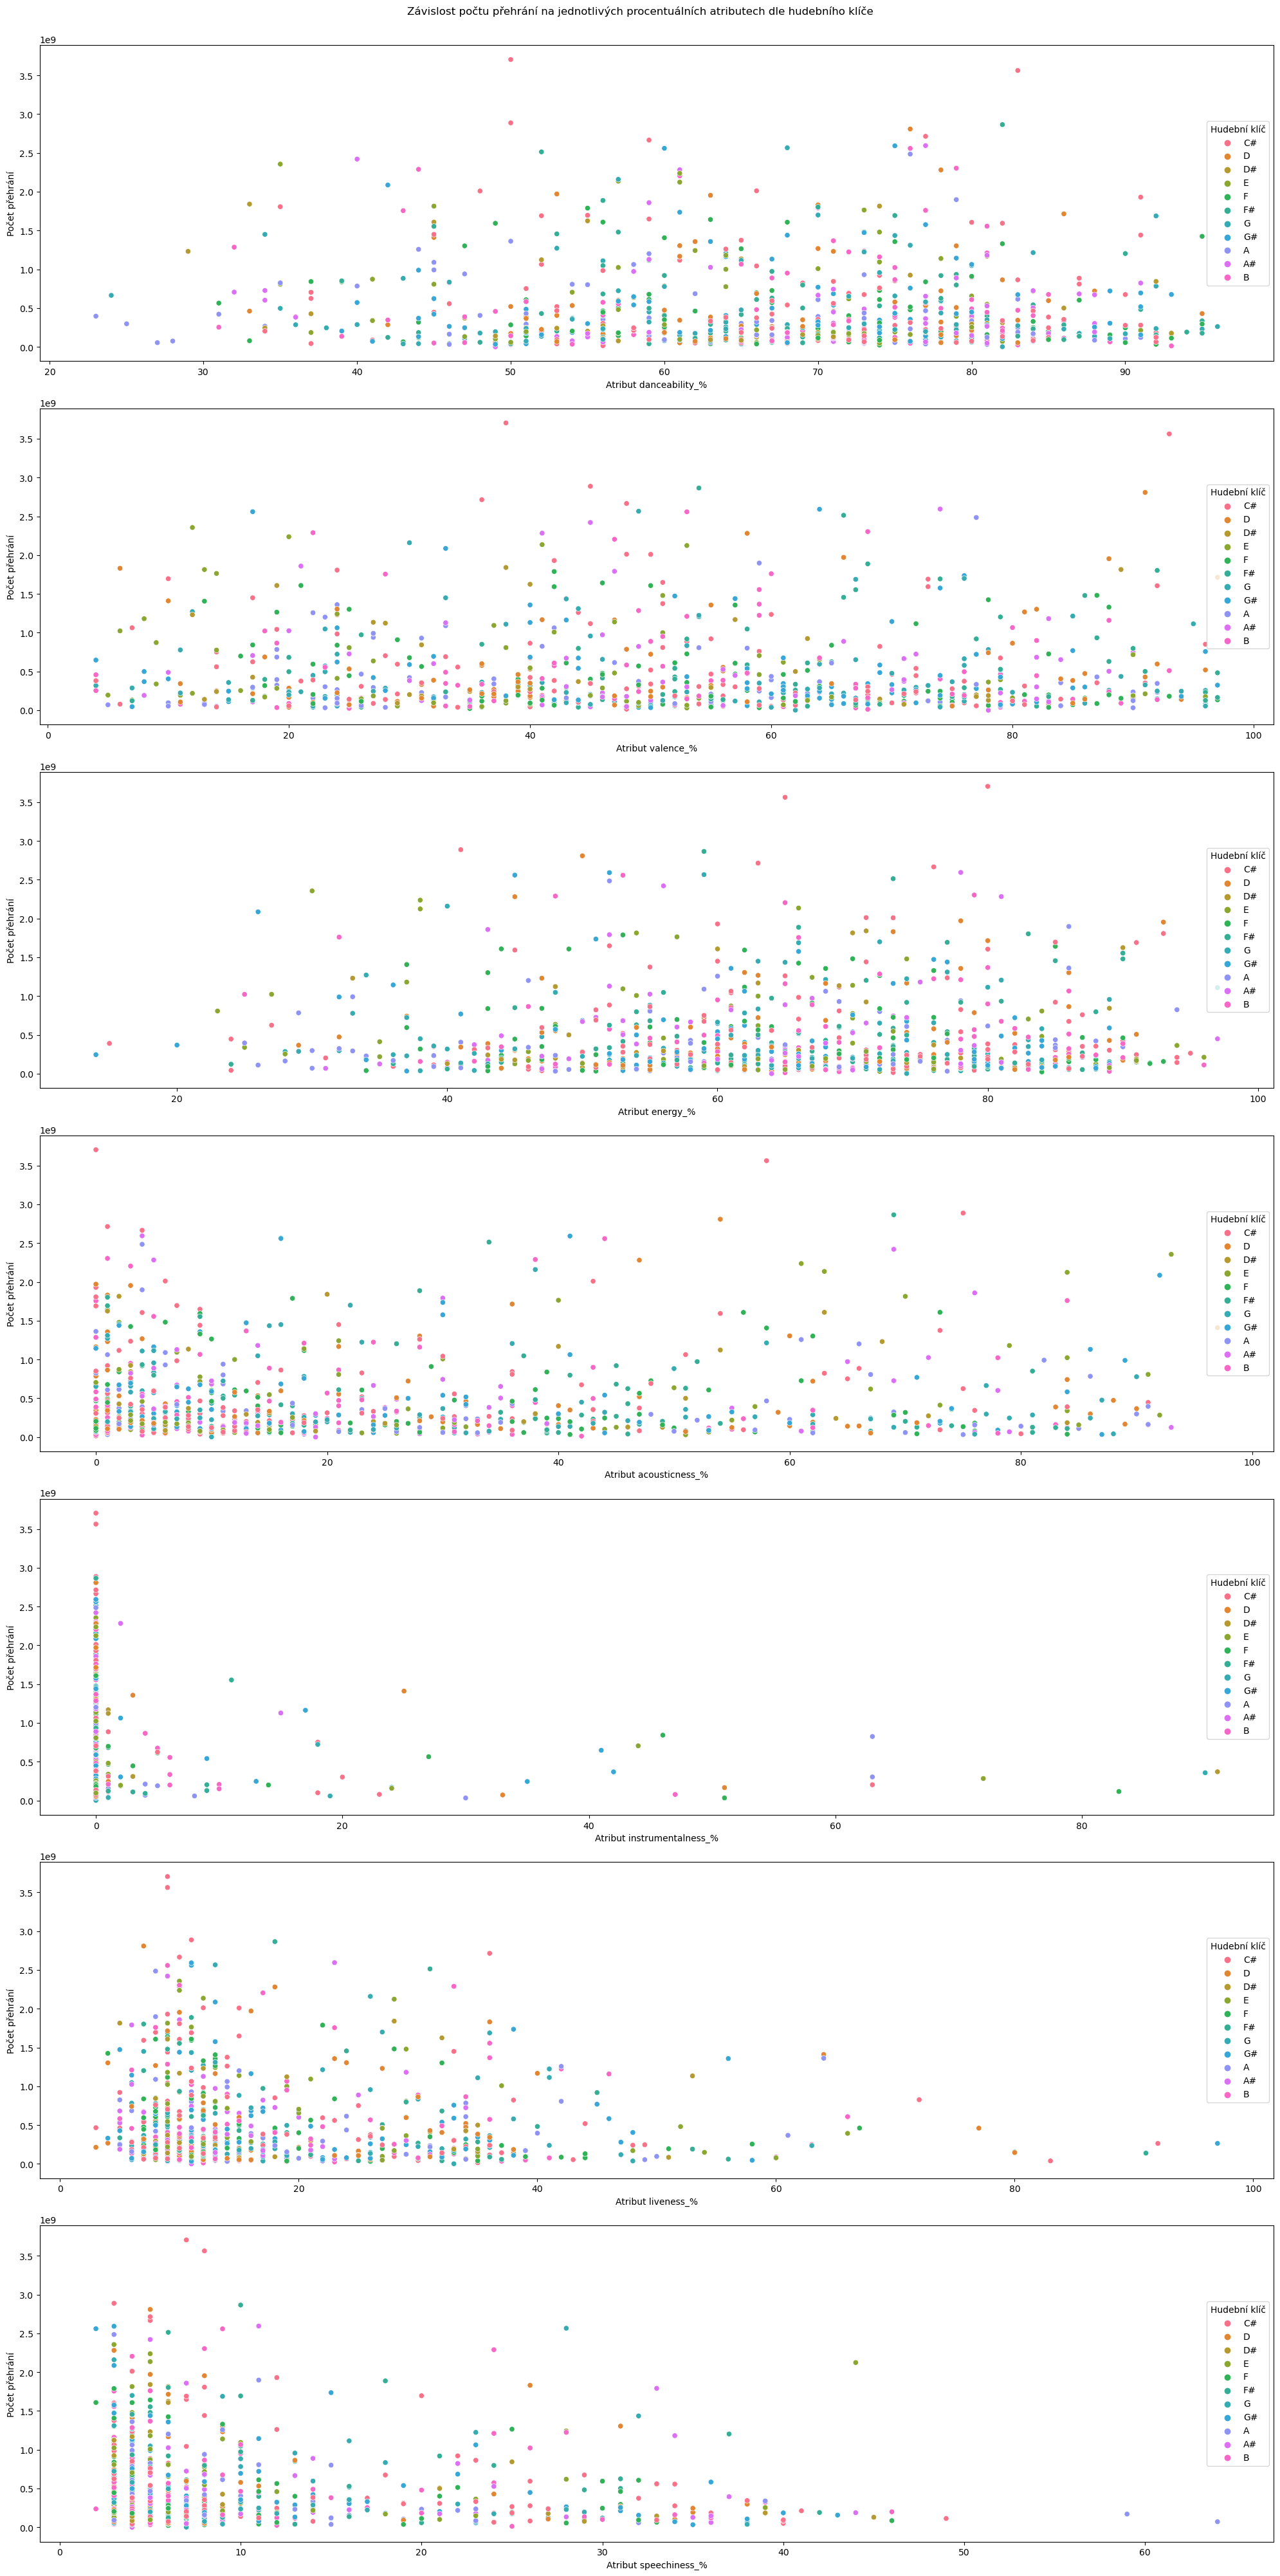

In [109]:
percentage_attributes = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(7, 1, figsize=(20, 40))
axes = axes.flatten()

for i, attribute in enumerate(percentage_attributes):
    ax = axes[i]
    sns.scatterplot(x=attribute, y='streams', hue='key', data=df, ax=ax, hue_order=ordered_keys)
    ax.set_xlabel(f'Atribut {attribute}')
    ax.set_ylabel('Počet přehrání')
    ax.legend(title='Hudební klíč', loc='right')

plt.suptitle('Závislost počtu přehrání na jednotlivých procentuálních atributech dle hudebního klíče', y=1)
plt.tight_layout()
plt.show()

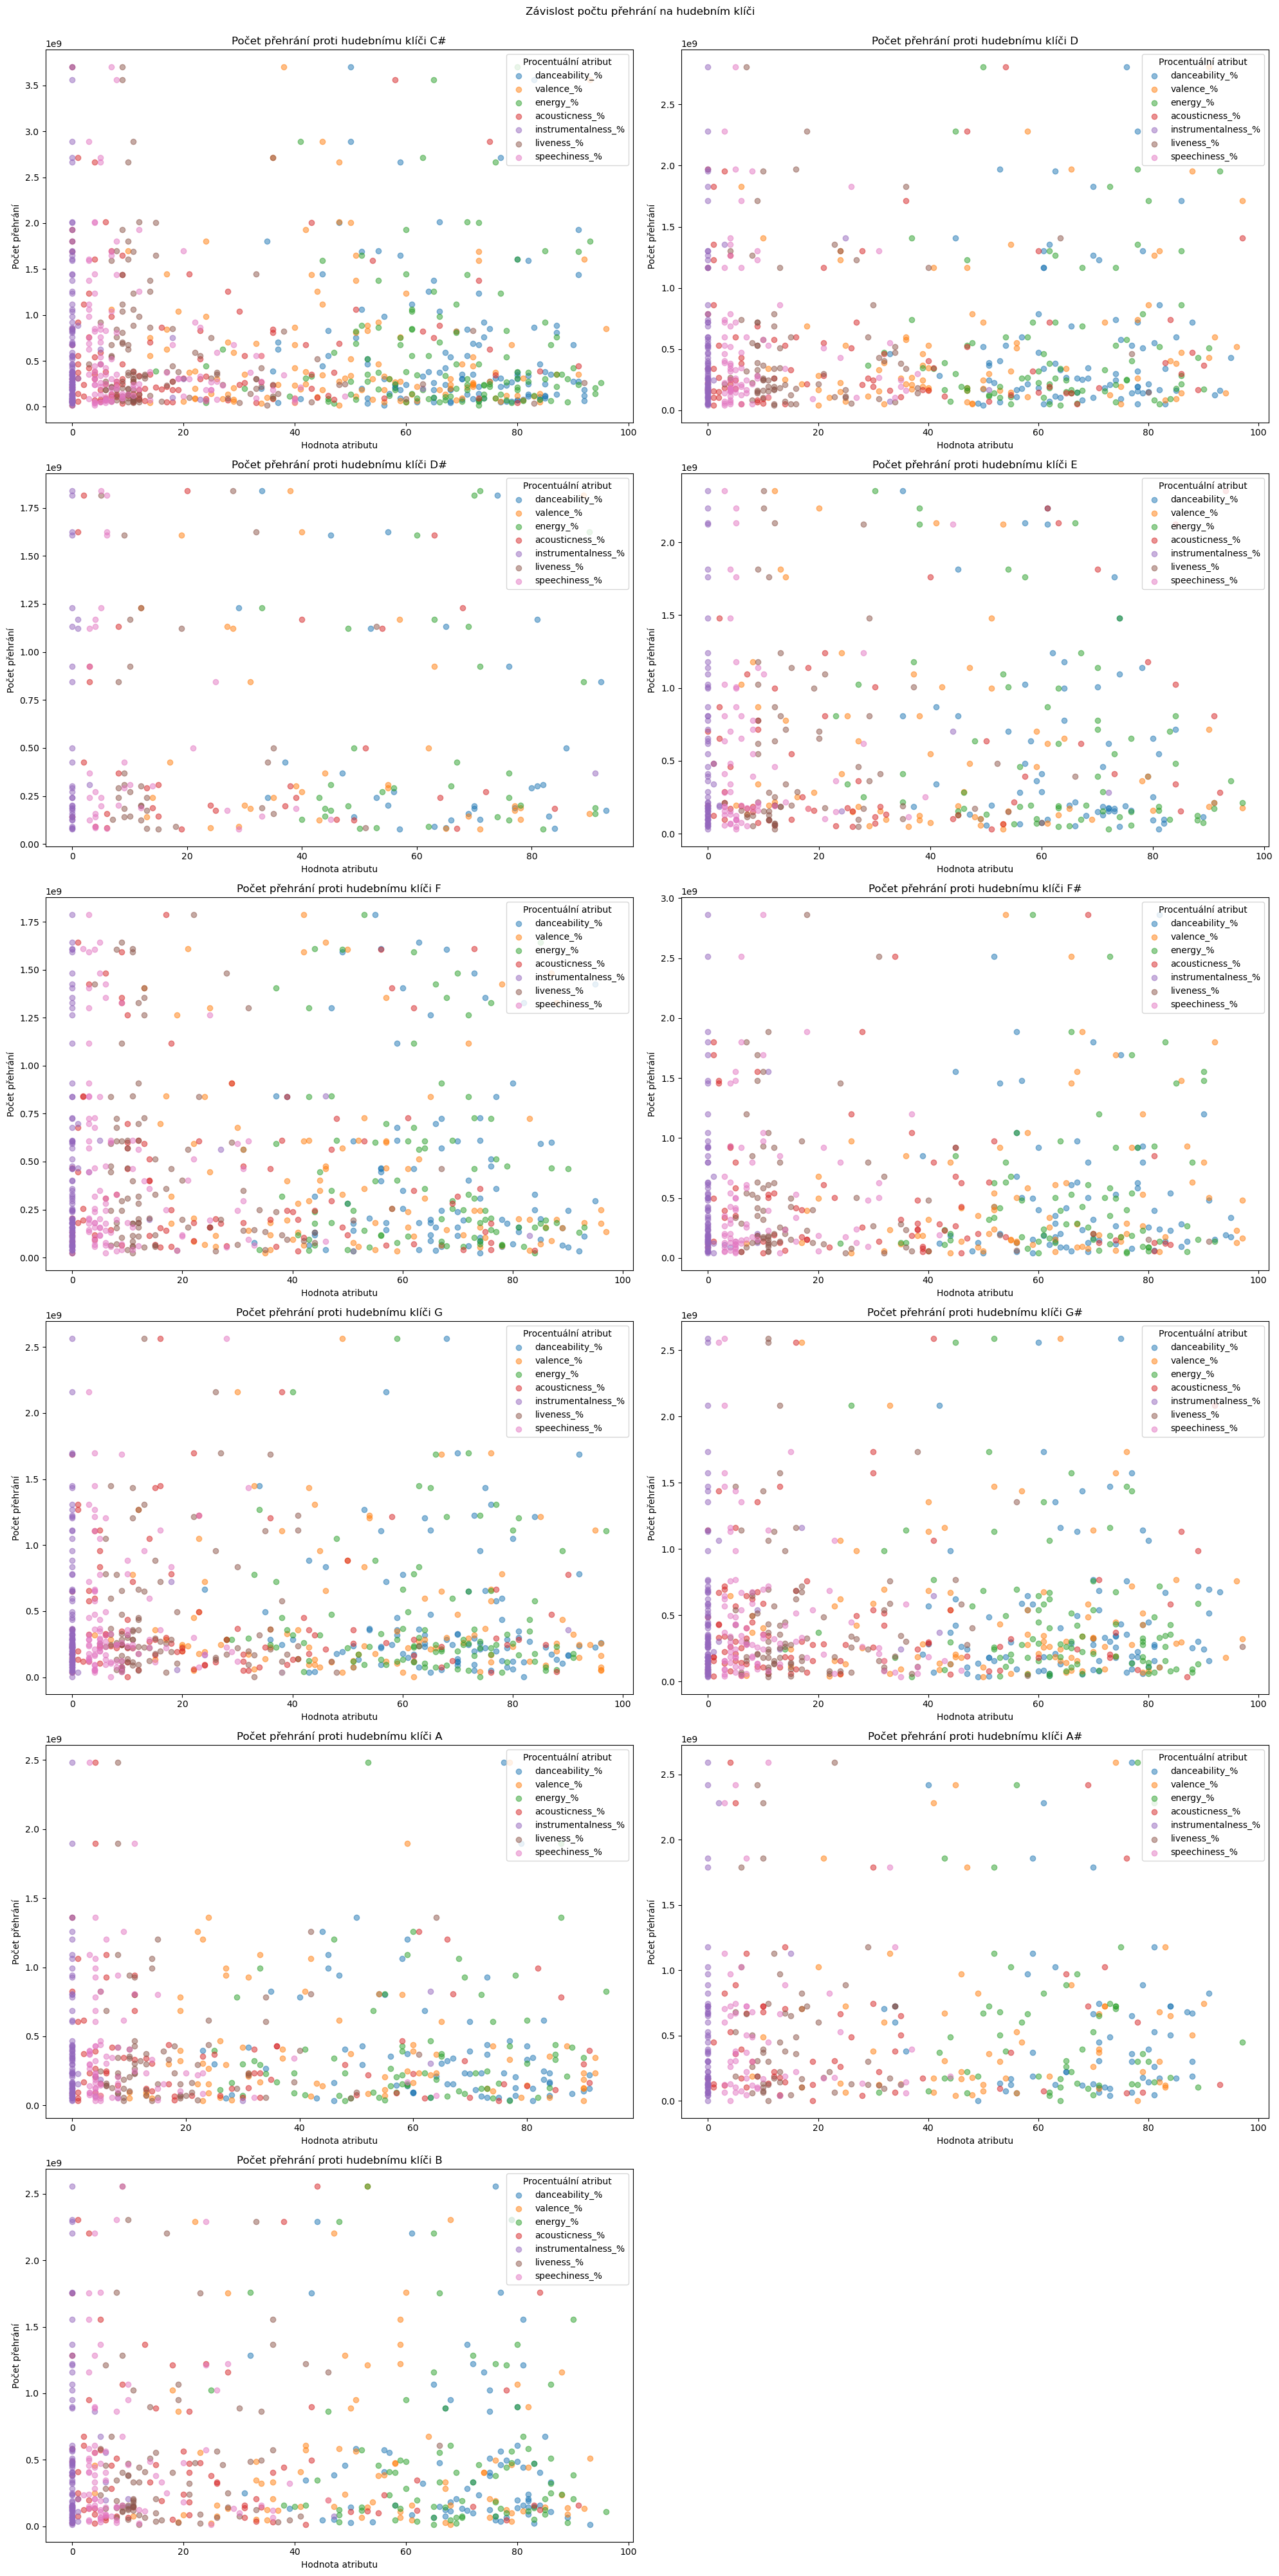

In [110]:
plt.figure(figsize=(20, 40))

for i, key in enumerate(ordered_keys):
    key_data = df[df['key'] == key]
    plt.subplot(6, 2, i + 1)
    for attribute in percentage_attributes:
        plt.scatter(key_data[attribute], key_data['streams'], label=attribute, alpha=0.5)

    plt.xlabel('Hodnota atributu')
    plt.ylabel('Počet přehrání')
    plt.title(f'Počet přehrání proti hudebnímu klíči {key}')
    plt.legend(title='Procentuální atribut', loc='upper right')

plt.suptitle('Závislost počtu přehrání na hudebním klíči', y=1)
plt.tight_layout()
plt.show()

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


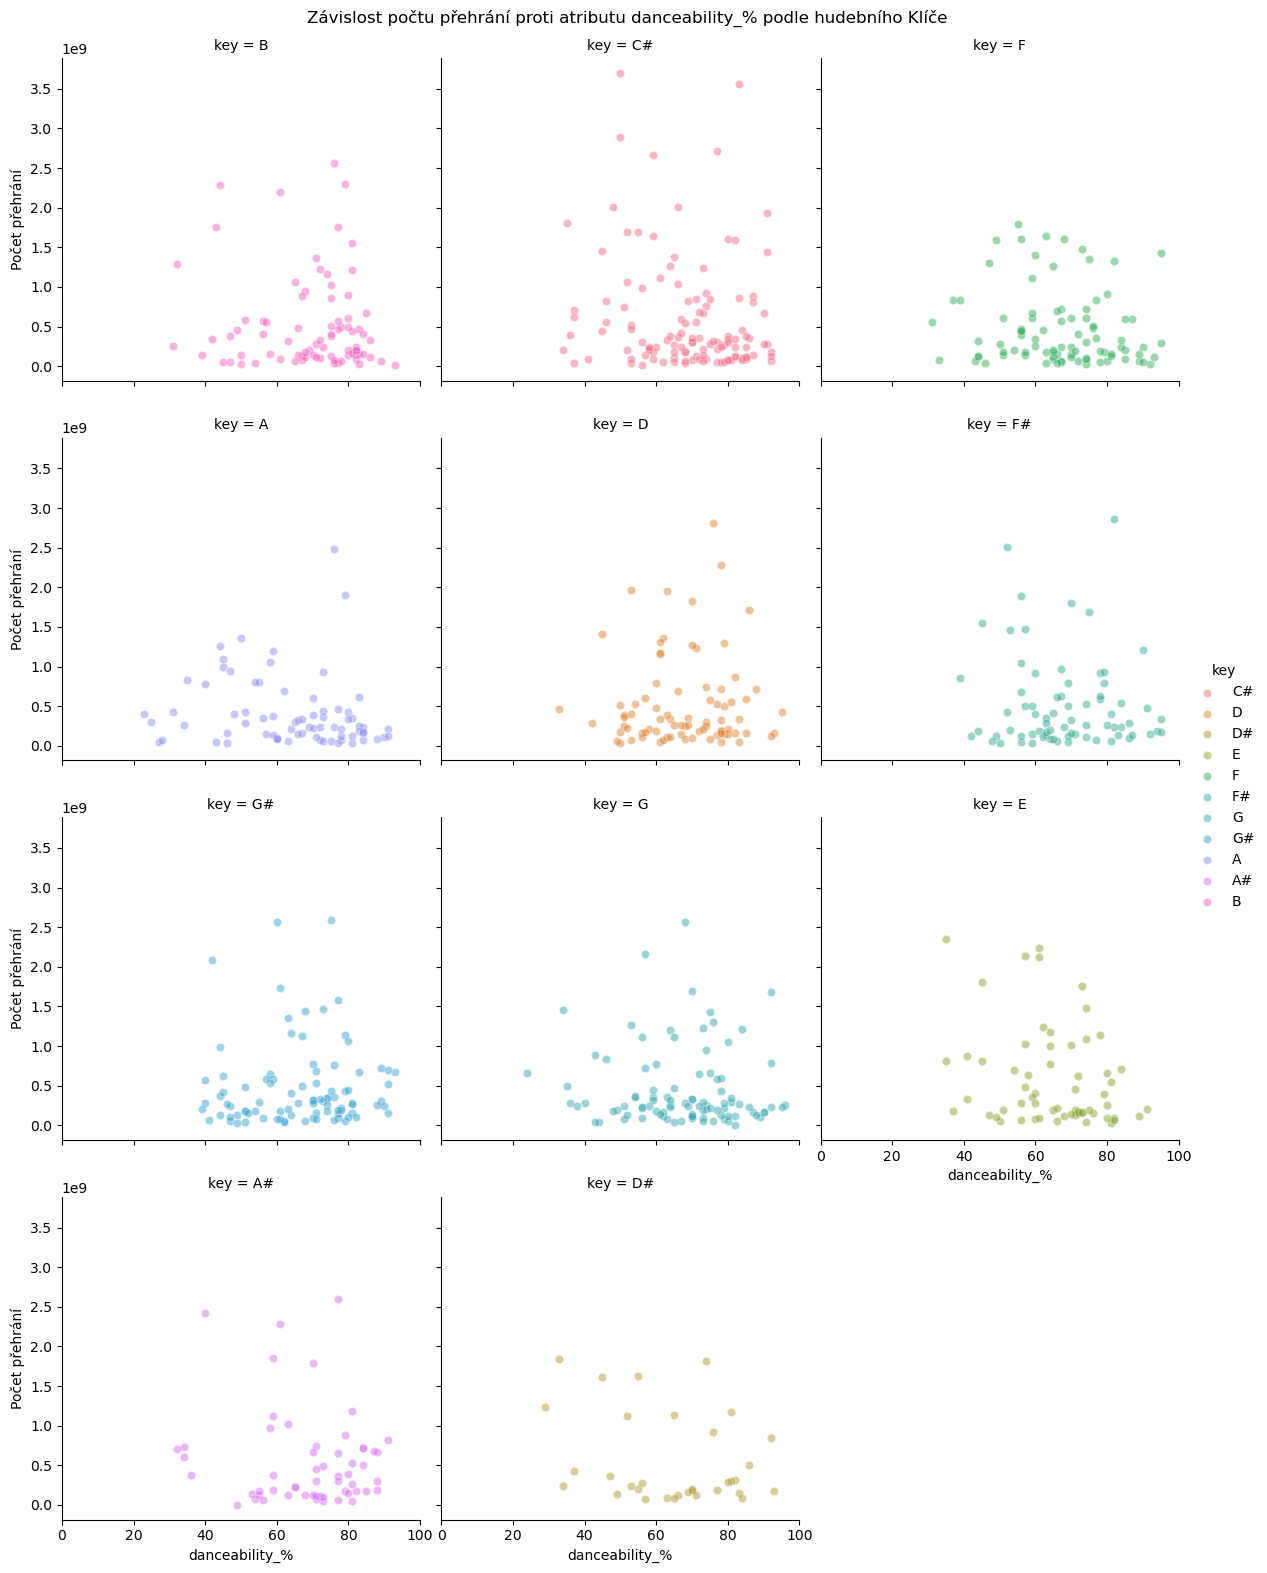

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


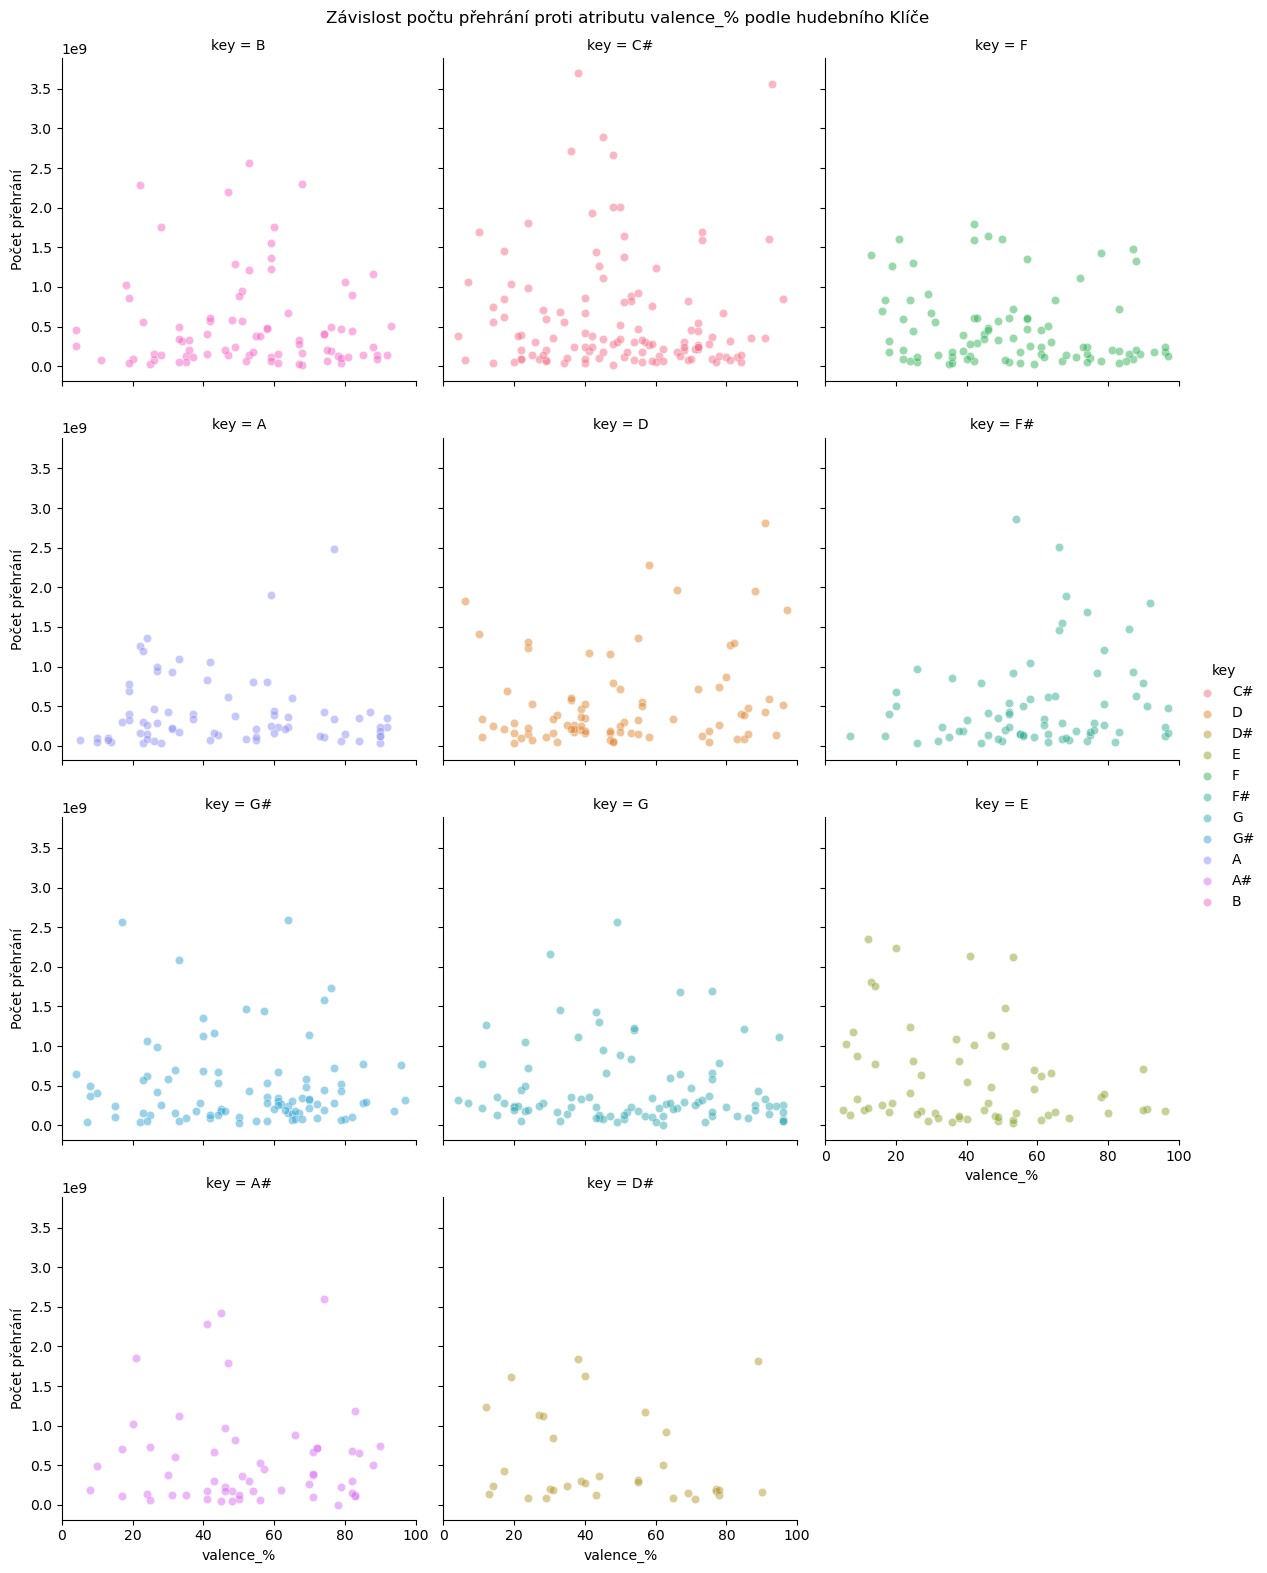

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


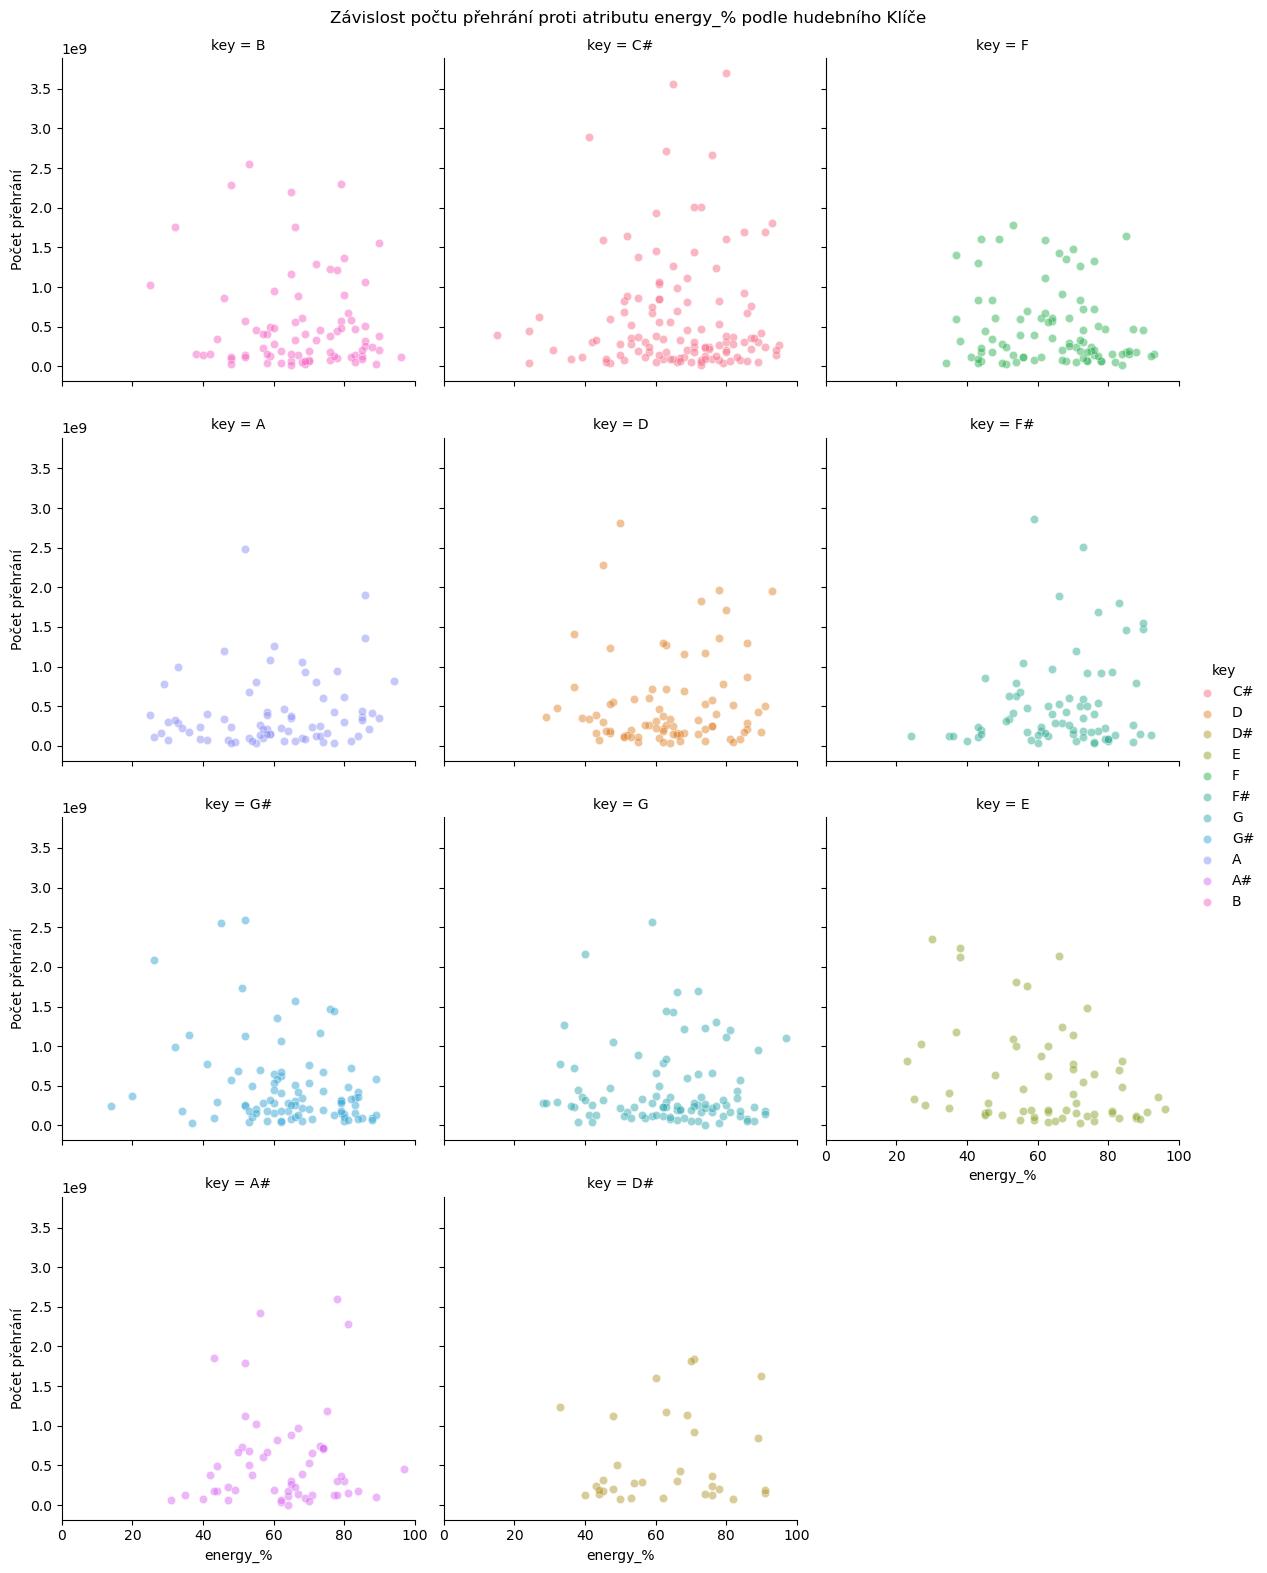

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


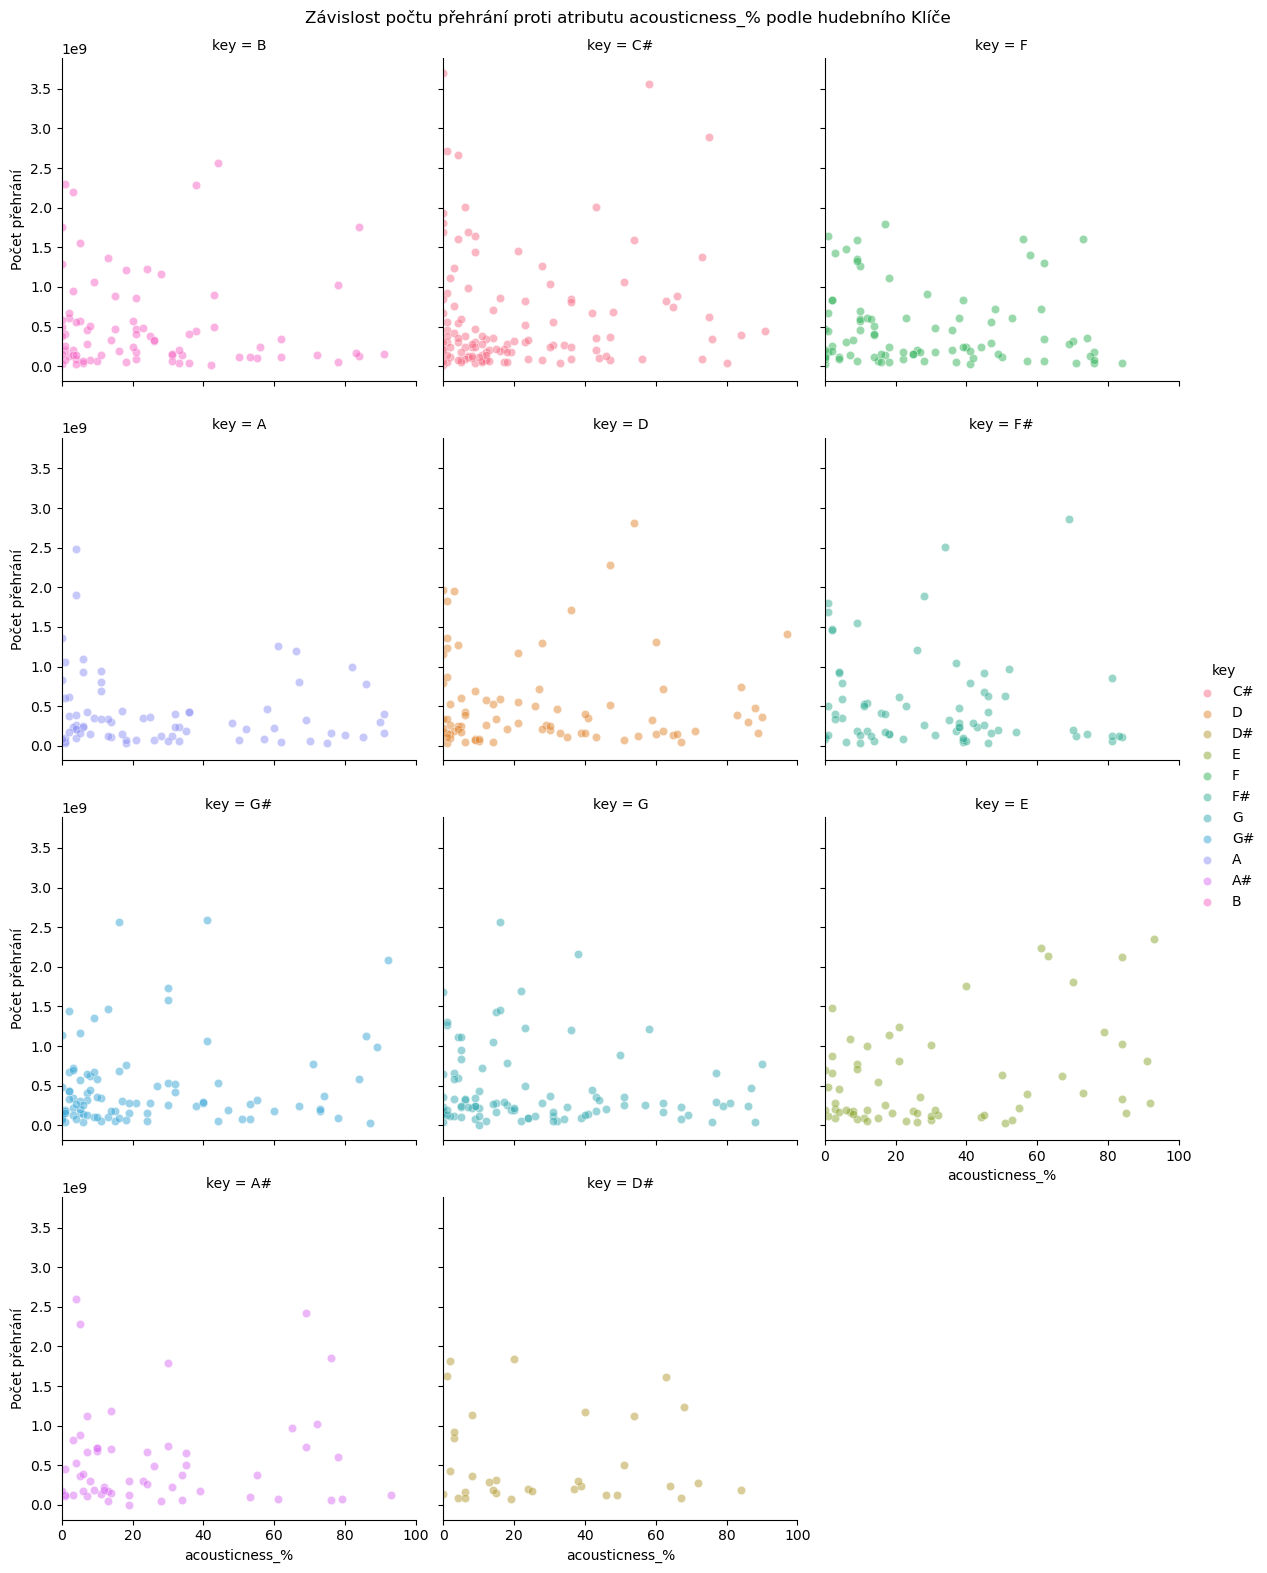

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


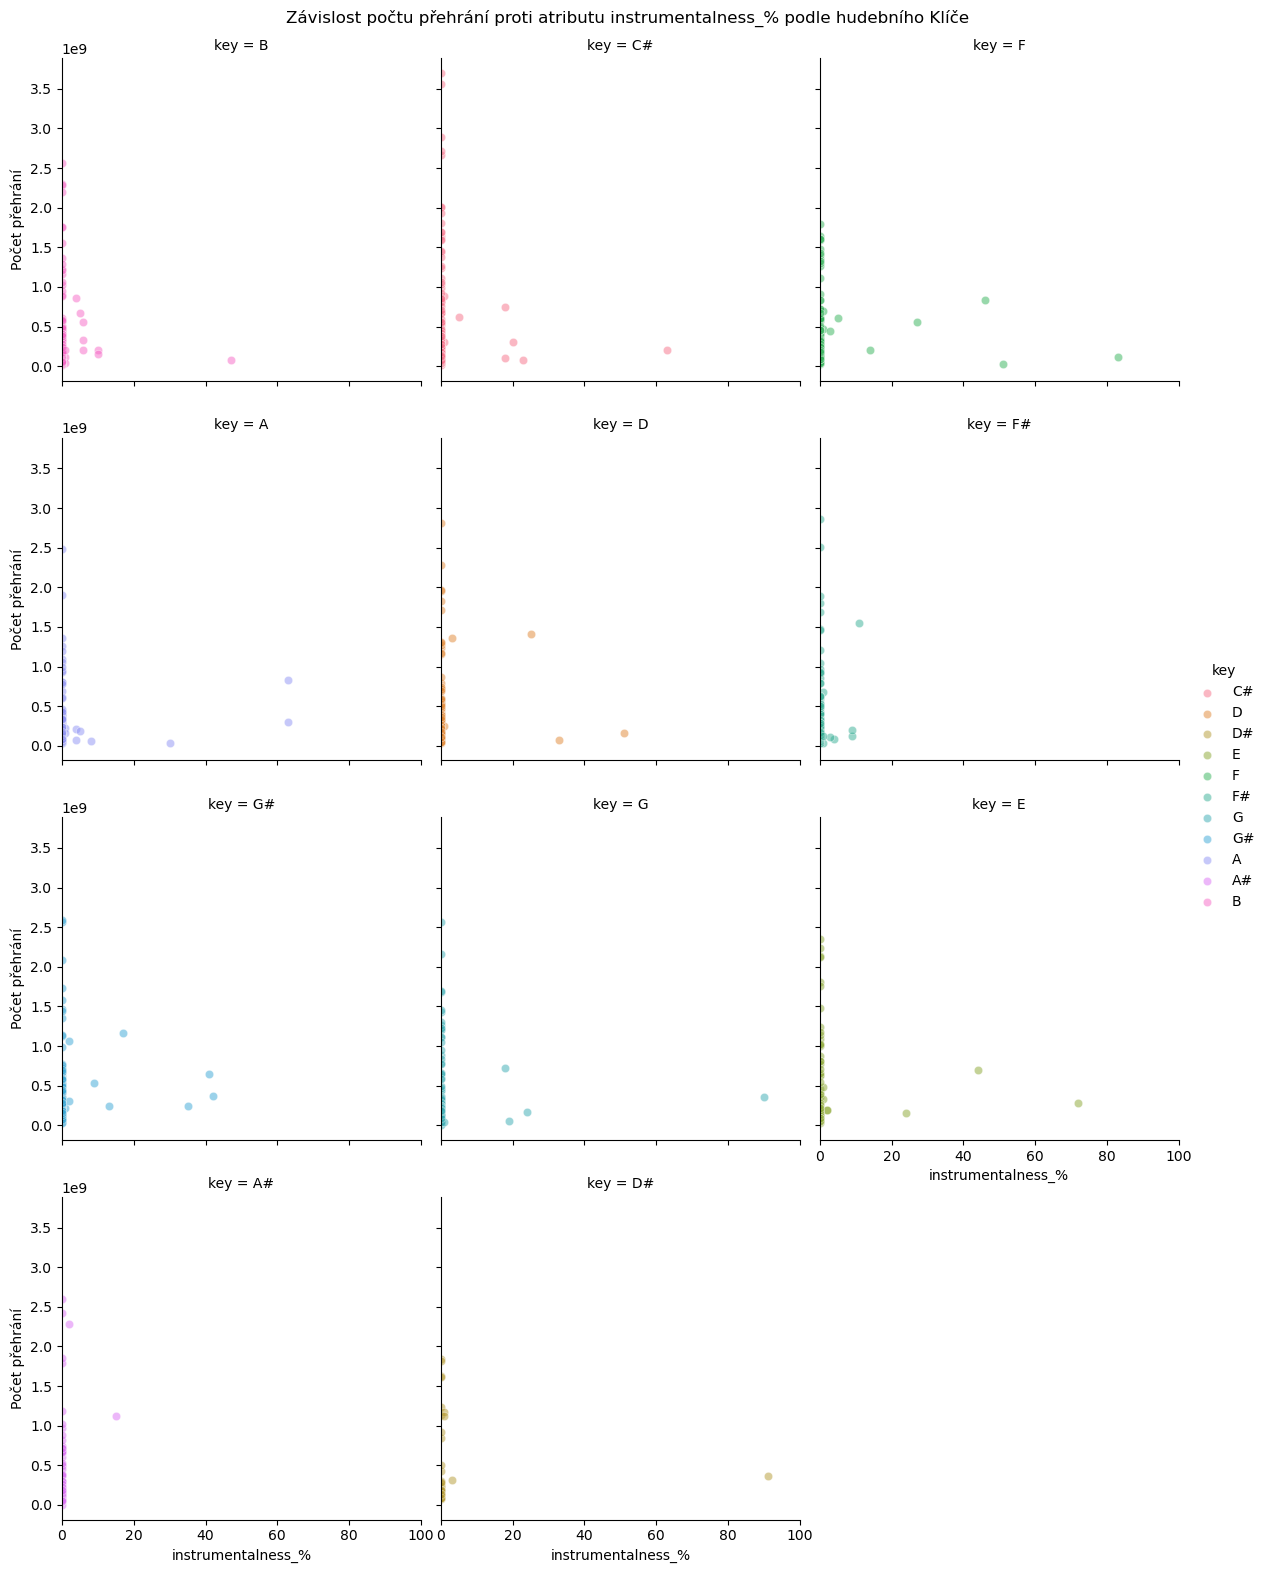

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


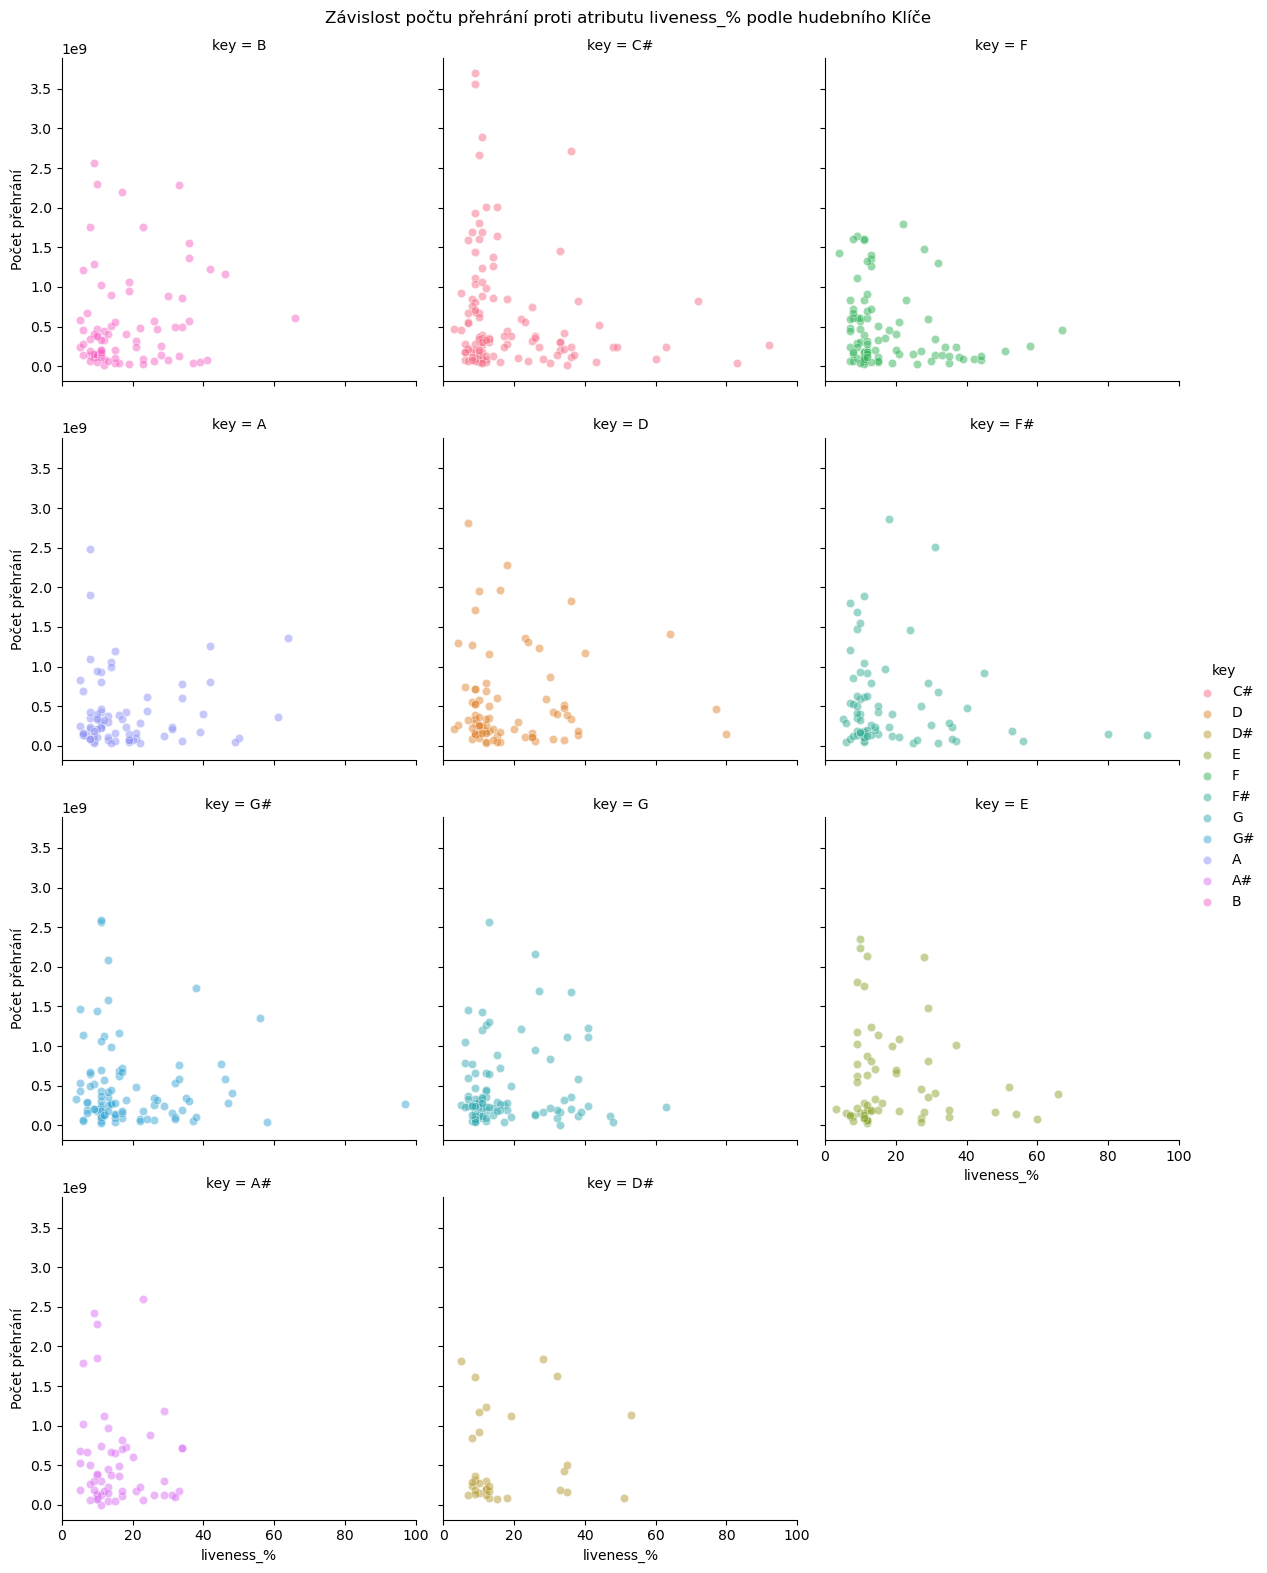

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


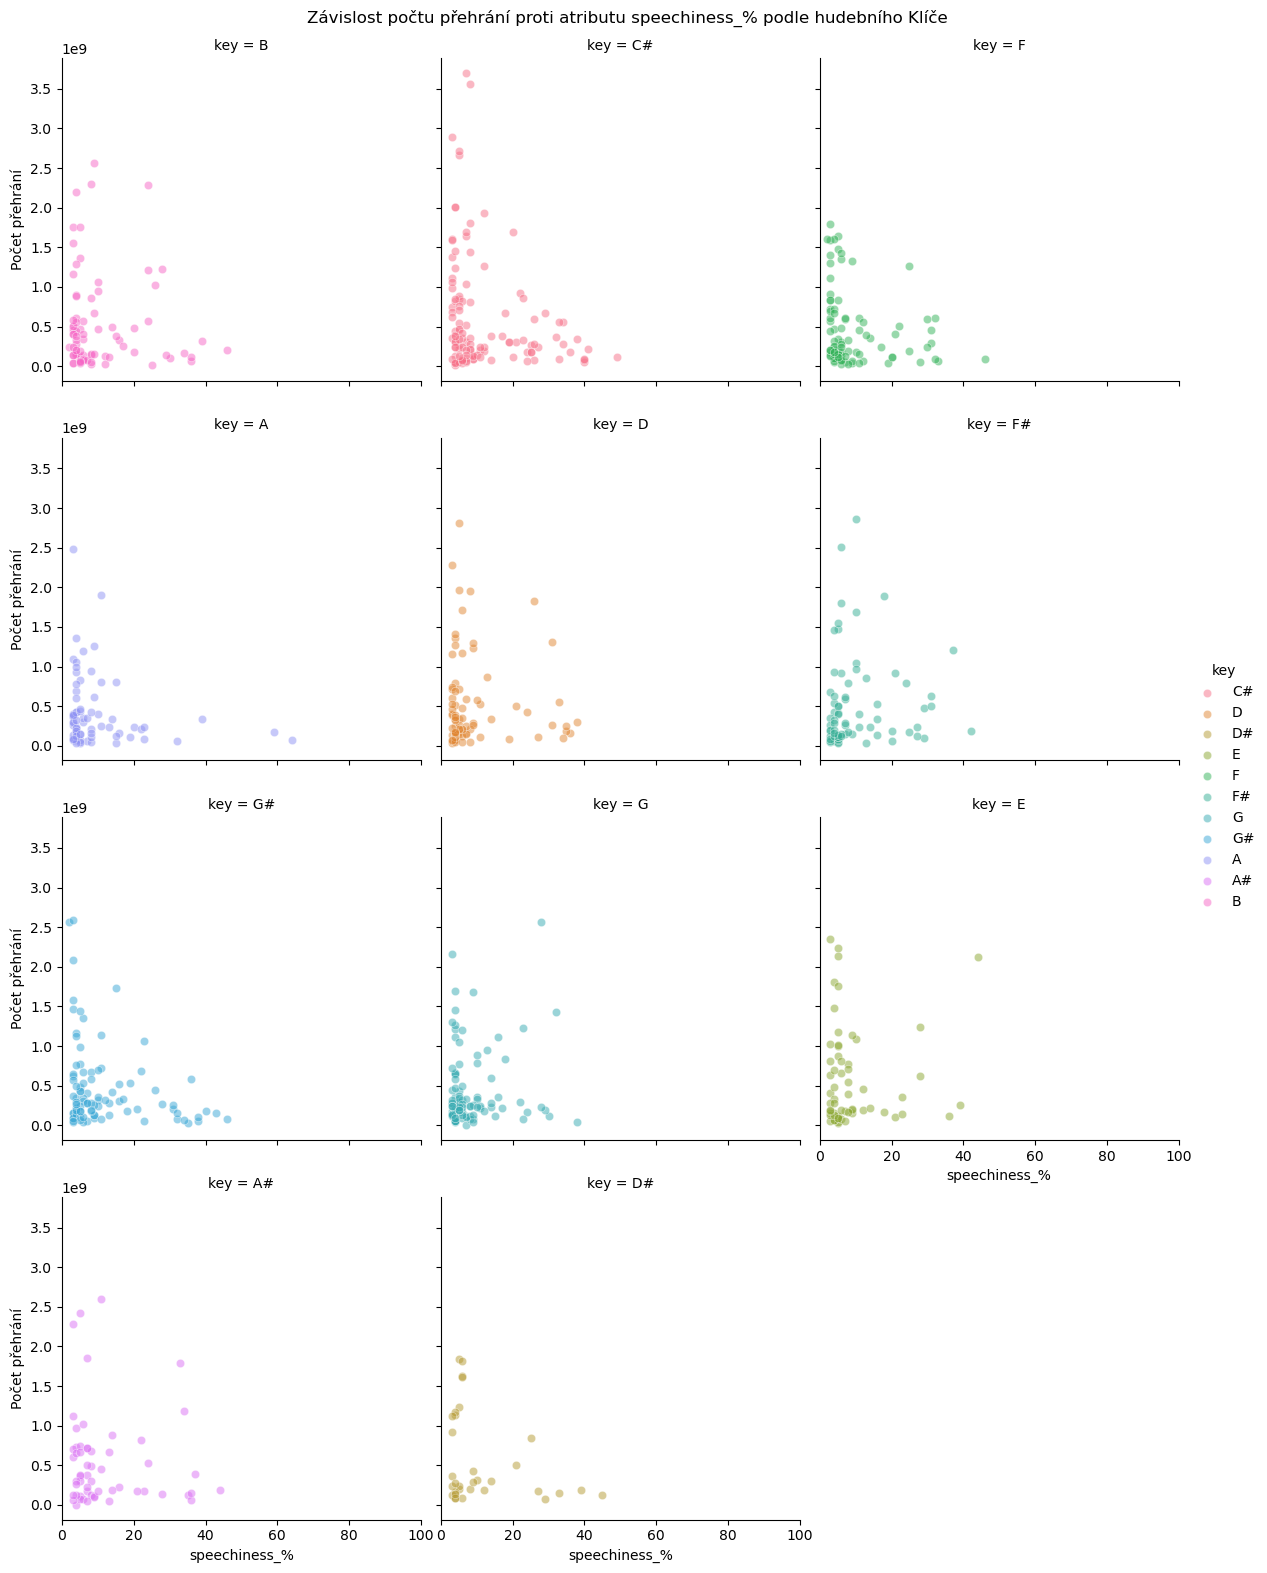

In [111]:
for attribute in percentage_attributes:
    g = sns.FacetGrid(df, col='key', hue='key', hue_order=ordered_keys, col_wrap=3, height=4)
    g = g.map(sns.scatterplot, attribute, 'streams', alpha=0.5).add_legend()
    g.set_axis_labels(attribute, 'Počet přehrání')
    g.fig.suptitle(f'Závislost počtu přehrání proti atributu {attribute} podle hudebního Klíče')
    plt.xlim(0, 100)
    plt.subplots_adjust(top=0.95)
    plt.show()

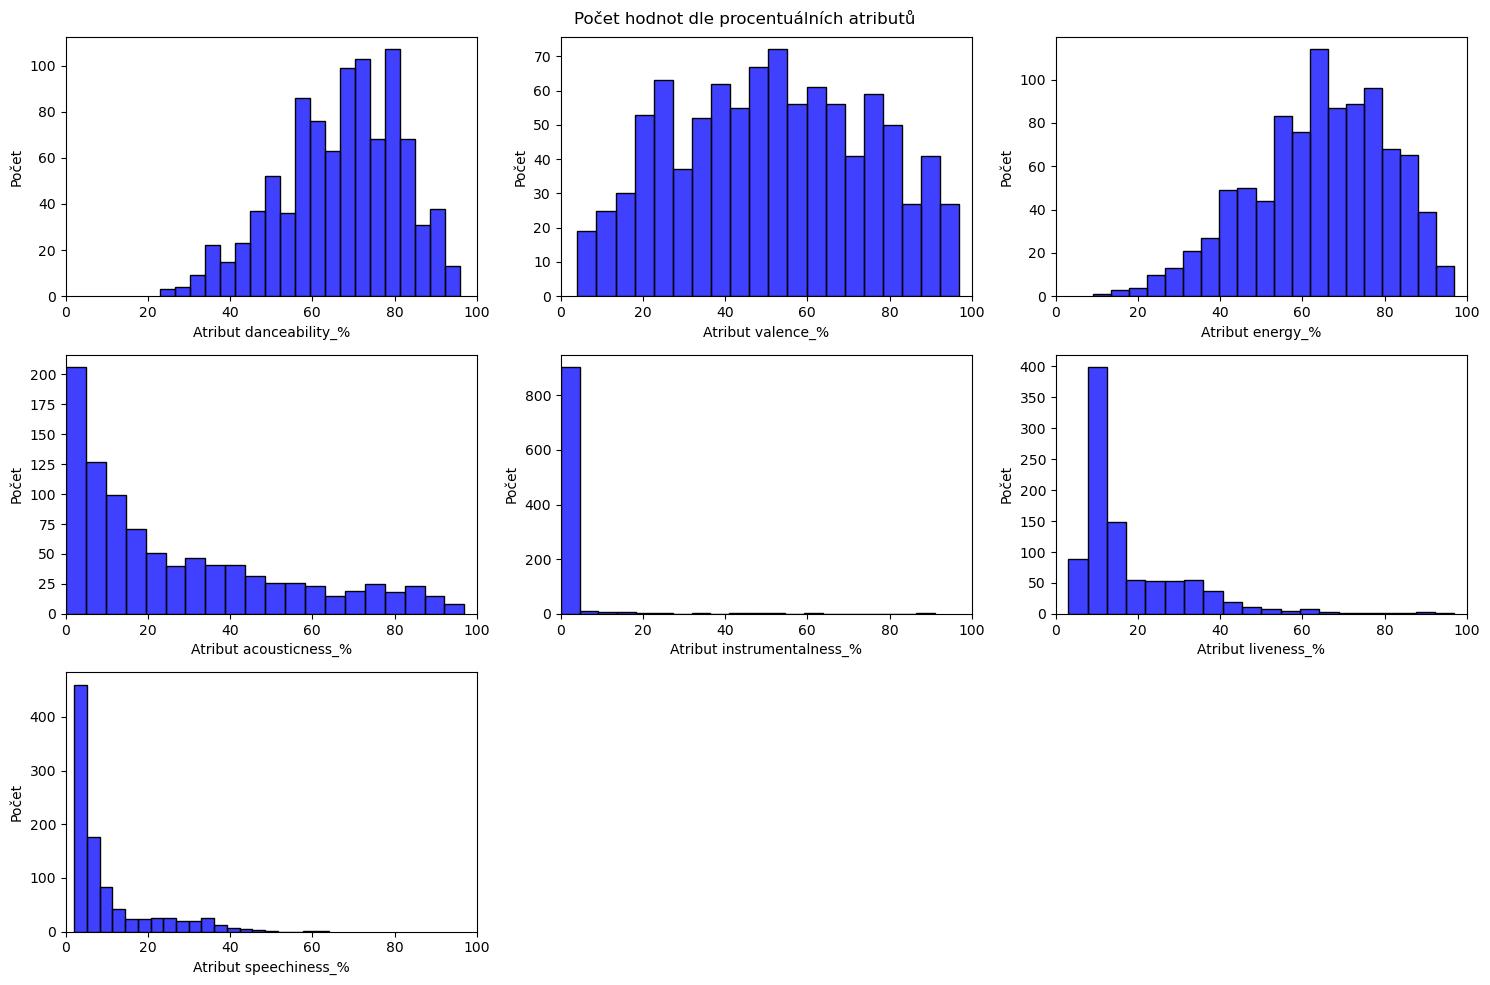

In [112]:
plt.figure(figsize=(15, 10)) 

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=attribute, bins=20, color='blue')
    plt.xlim(0, 100)
    plt.xlabel(attribute)
    plt.ylabel("Počet")
    plt.xlabel(f'Atribut {attribute}')

plt.suptitle('Počet hodnot dle procentuálních atributů')
plt.tight_layout()
plt.show()

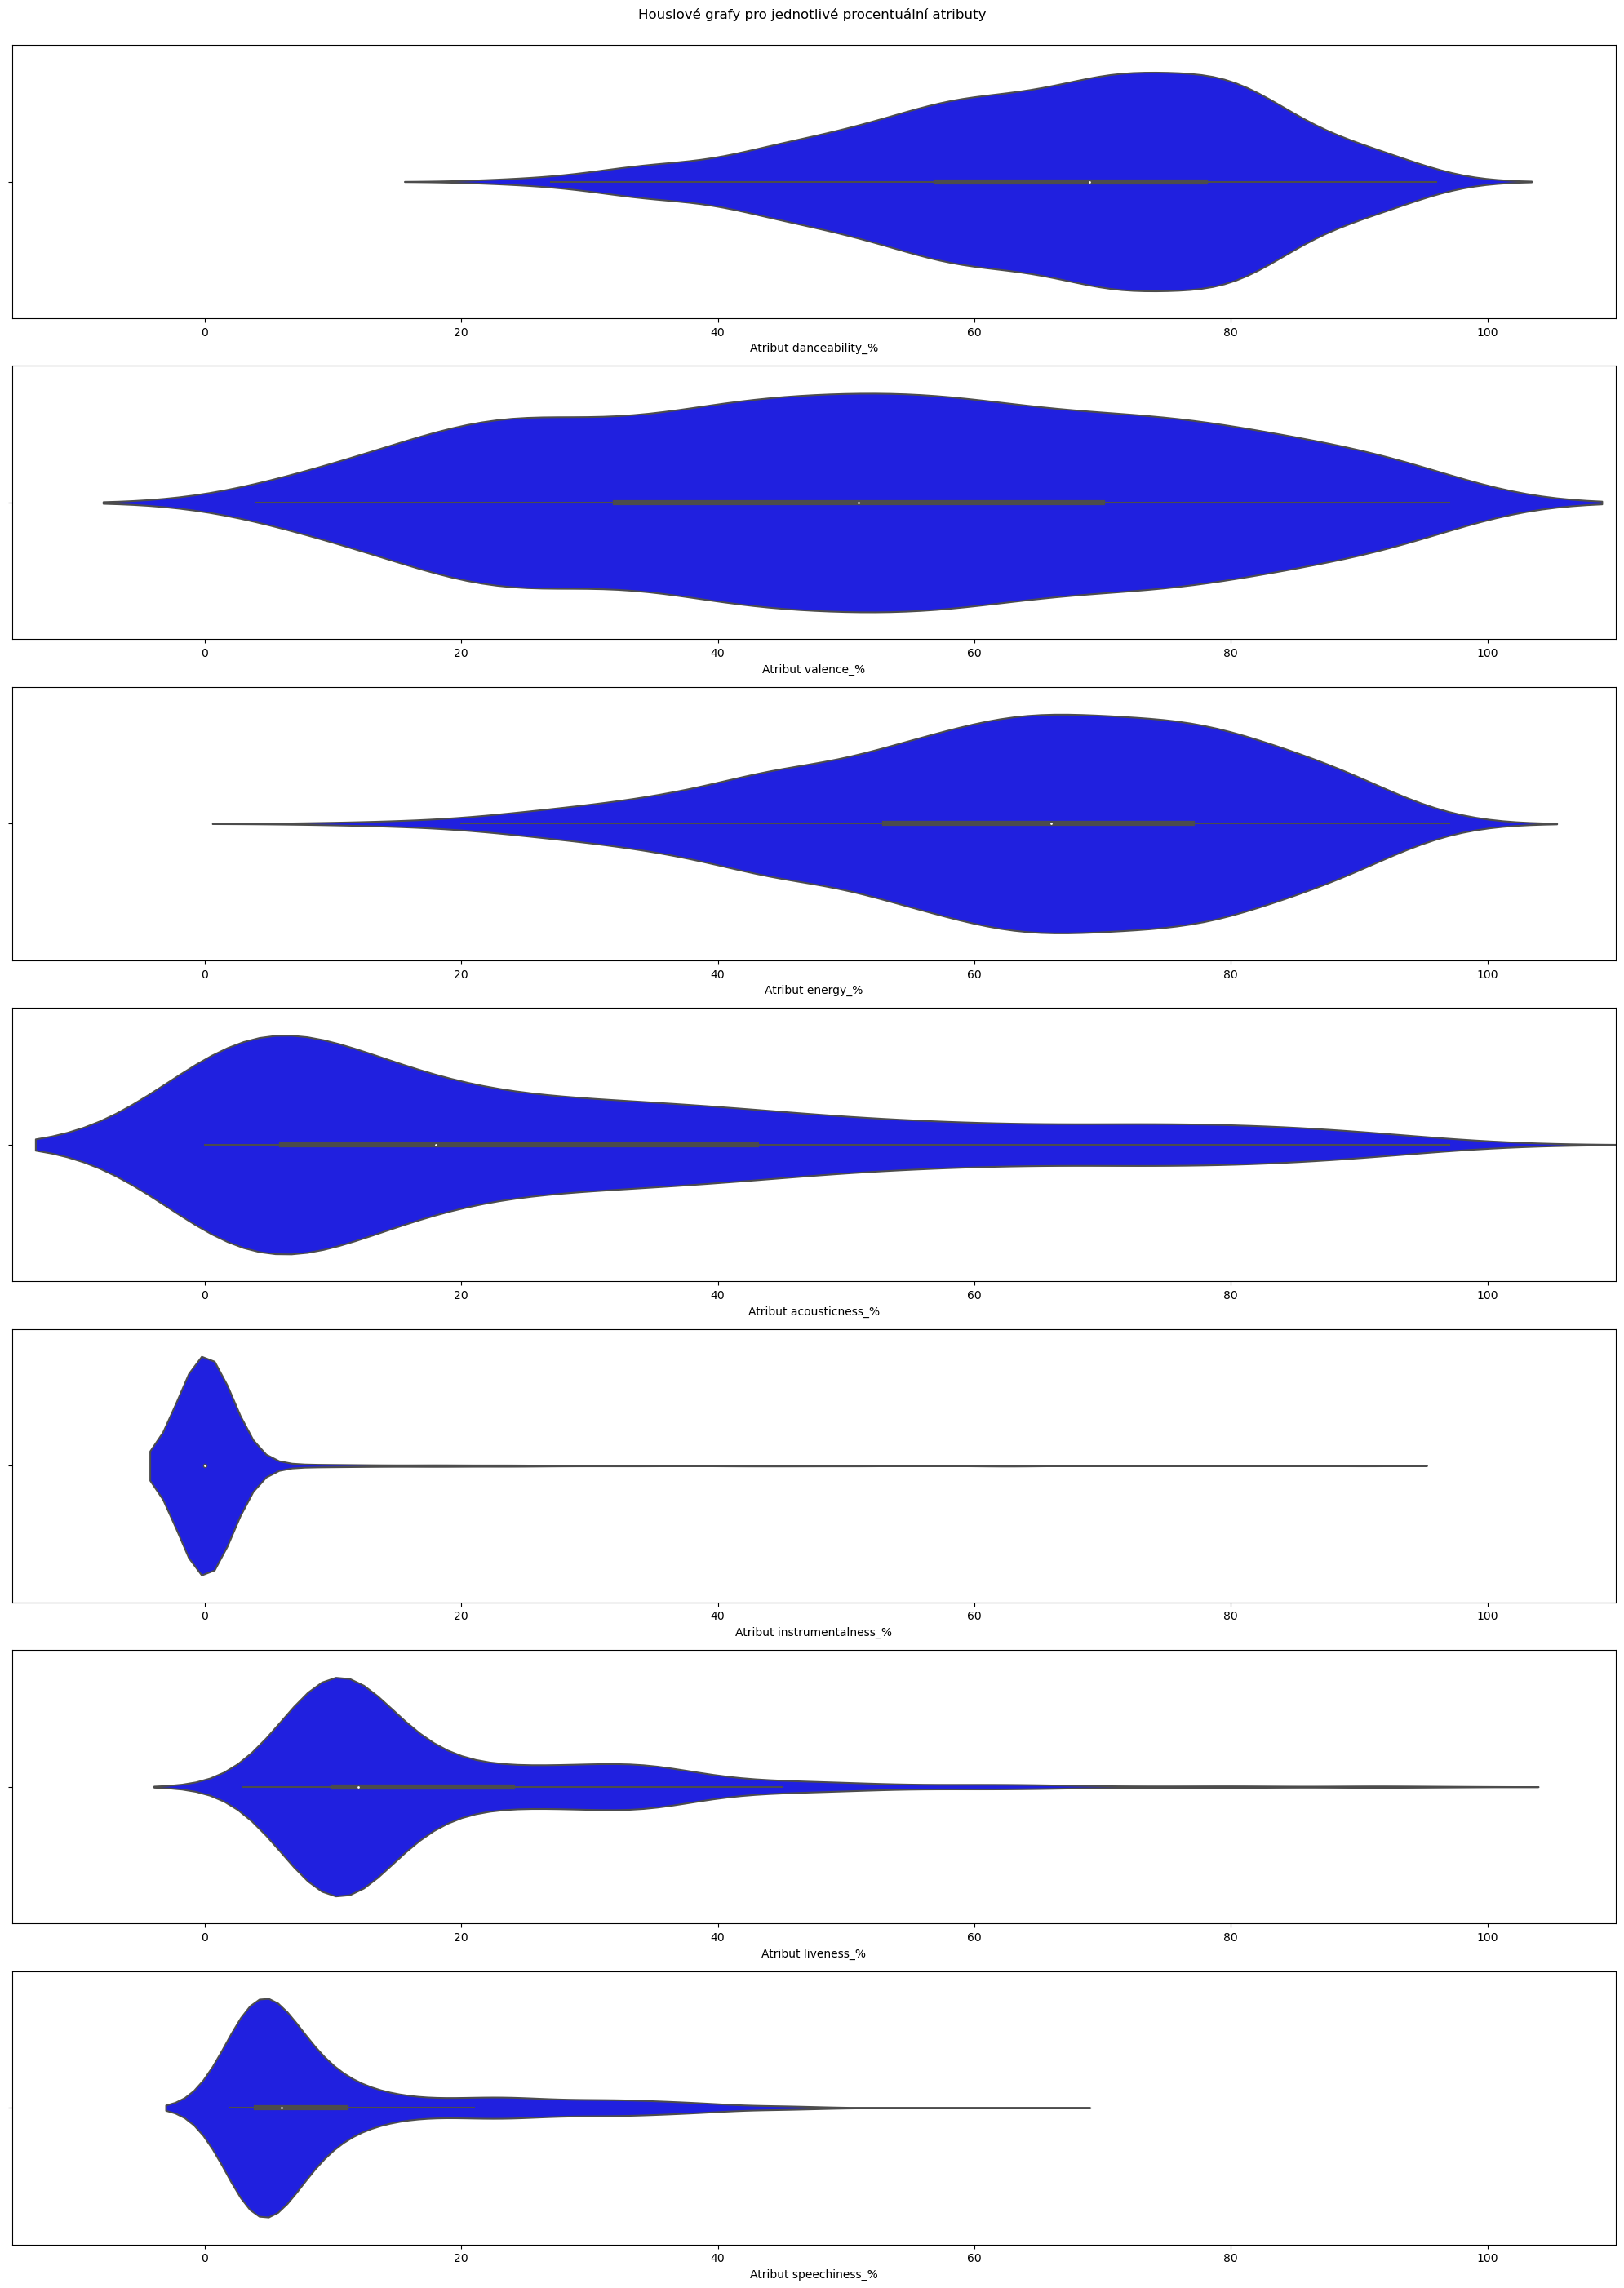

In [113]:
plt.figure(figsize=(20, len(percentage_attributes) * 4))

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(len(percentage_attributes), 1, i)
    sns.violinplot(x=df[attribute], color='blue')
    plt.xlim(-15, 110)
    plt.xlabel(f'Atribut {attribute}')

plt.suptitle('Houslové grafy pro jednotlivé procentuální atributy', y=1)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df[percentage_attributes], plot_kws={'color': 'blue'}, diag_kws={'color': 'blue'})
plt.suptitle('Závislost jednoho procentuálního atributu na ostatních', y=1)
plt.show()

/home/david/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [ ]:
plt.figure(figsize=(15, 20)) 

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=attribute, y='streams', data=df, hue=attribute, palette='viridis', legend=False, alpha=0.5)
    plt.title(f'Závislost atributu {attribute} na počtu přehrání')
    plt.xlabel(attribute)
    plt.xlim(0, 100)
    plt.ylabel('Počet přehrání')
    plt.xlabel(f'Atribut {attribute}')

plt.suptitle('Závislost počtu přehrání na jednotlivých procentuálních atributech', y=1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 20)) 

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=attribute, y='bpm', data=df, hue=attribute, palette='viridis', legend=False, alpha=0.5)
    plt.title(f'Závislost atributu {attribute} na BPM')
    plt.xlabel(attribute)
    plt.xlim(0, 100)
    plt.ylabel('BPM')
    plt.xlabel(f'Atribut {attribute}')

plt.suptitle('Závislost BPM na jednotlivých procentuálních atributech', y=1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['bpm'], kde=True, color='blue')
plt.xlabel('BPM')
plt.ylabel('Počet')
plt.title('Histogram pro BPM')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['bpm'], color='blue')
plt.xlabel('BPM')
plt.title('Krabicový graf pro BPM')

plt.show()

In [ ]:
plt.figure(figsize=(15, len(percentage_attributes) * 3))

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(len(percentage_attributes), 1, i)
    yearly_means = df.groupby('released_year')[attribute].mean()
    plt.plot(yearly_means, label=attribute, color='blue')
    plt.title(f'Atribut {attribute}')
    plt.xlabel('Rok vydání')
    plt.ylabel('Průměrná hodnota [%]')

plt.suptitle('Rozložení roku vydání skladby dle jednotlivých procentuálních atributů', y=1)
plt.tight_layout()
plt.show()

In [ ]:
year_counts = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=year_counts, color='blue')
plt.title('Rozložení skladeb podle roku vydání')
plt.xlabel('Rok vydání')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Počet skladeb')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=df, color='blue')
plt.title('Vztah mezi počtem přehrání a počtem umělců ve skladbě')
plt.xlabel('Počet umělců')
plt.ylabel('Počet přehrání')
plt.show()

In [ ]:
plt.figure(figsize=(15, 20))

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=attribute, y='in_spotify_playlists', data=df, hue=attribute, palette='viridis', legend=False, alpha=0.5)
    plt.xlim(0, 100)
    plt.title(f"Závislost atributu {attribute} na počtu Spotify playlistů se skladbou")
    plt.xlabel(attribute)
    plt.ylabel("Počet Spotify playlistů se skladbou")

plt.suptitle('Rozložení počtu Spotify playlistů se skladbou dle jednotlivých procentuálních atributů', y=1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 20))

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=attribute, y='in_apple_playlists', data=df, hue=attribute, palette='viridis', legend=False, alpha=0.5)
    plt.xlim(0, 100)
    plt.title(f"Závislost atributu {attribute} na počtu Apple playlistů se skladbou")
    plt.xlabel(attribute)
    plt.ylabel("Počet Apple playlistů se skladbou")

plt.suptitle('Rozložení počtu Apple playlistů se skladbou dle jednotlivých procentuálních atributů', y=1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 20))

for i, attribute in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=attribute, y='in_deezer_playlists', data=df, hue=attribute, palette='viridis', legend=False, alpha=0.5)
    plt.title(f"Závislost atributu {attribute} na počtu Deezer playlistů se skladbou")
    plt.xlabel(attribute)
    plt.ylabel("Počet Deezer playlistů se skladbou")

plt.suptitle('Rozložení počtu Deezer playlistů se skladbou dle jednotlivých procentuálních atributů', y=1)
plt.tight_layout()
plt.show()

In [ ]:
in_spotify_playlist = (df['in_spotify_playlists'] > 0).astype(int)
in_apple_playlist = (df['in_apple_playlists'] > 0).astype(int)
in_deezer_playlist = (df['in_deezer_playlists'] > 0).astype(int)

plt.figure(figsize=(15, 20))

for i, column in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    
    sns.kdeplot(df[in_spotify_playlist == 1][column], label='Spotify')
    sns.kdeplot(df[in_apple_playlist == 1][column], label='Apple')
    sns.kdeplot(df[in_deezer_playlist == 1][column], label='Deezer')

    plt.title(f"Distribuce {column}")
    plt.xlabel(column)
    plt.ylabel("Hustota")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
in_spotify_chart = (df['in_spotify_charts'] > 0).astype(int)
in_apple_chart = (df['in_apple_charts'] > 0).astype(int)
in_deezer_chart = (df['in_deezer_charts'] > 0).astype(int)
in_shazam_chart = (df['in_shazam_charts'] > 0).astype(int)

plt.figure(figsize=(15, 20))

for i, column in enumerate(percentage_attributes, 1):
    plt.subplot(4, 2, i)
    
    sns.kdeplot(df[in_spotify_chart == 1][column], label='Spotify')
    sns.kdeplot(df[in_apple_chart == 1][column], label='Apple')
    sns.kdeplot(df[in_deezer_chart == 1][column], label='Deezer')
    sns.kdeplot(df[in_shazam_chart == 1][column], label='Shazam')

    plt.title(f"Distribuce {column}")
    plt.xlabel(column)
    plt.ylabel("Hustota")
    plt.legend()

plt.suptitle('Porovnání jednotlivých procentuálních atributů dle chartů', y=1)
plt.tight_layout()
plt.show()

#### 3. Podúkol

Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

#### 4. Podúkol

Proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.

In [ ]:
missing_values = df.isnull().sum()

missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Missing values'])
missing_values_df.index.name = 'Attribute'

missing_values_df

In [ ]:
df[df['streams'].isnull()]

In [ ]:
df[df['in_shazam_charts'].isnull()]

In [ ]:
df[df['key'].isnull()]

In [ ]:
# Výpočet počtu chybějících hodnot pro každý řádek
missing_per_row = df.isnull().sum(axis=1)

# Získání počtu řádků pro každý počet chybějících hodnot
row_counts = missing_per_row.value_counts().sort_index()

row_counts_df = pd.DataFrame(row_counts).reset_index()
row_counts_df.columns = ['Count of missing values', 'Number of rows']

row_counts_df

In [ ]:
# Filtrace pro zobrazení řádků s právě jednou chybějícími hodnotami
rows_with_one_missing = df[missing_per_row == 1]

rows_with_one_missing

In [ ]:
# Filtrace pro zobrazení řádků s právě dvěmi chybějícími hodnotami
rows_with_two_missing = df[missing_per_row == 2]

rows_with_two_missing

#### 5. Podúkol

Proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

In [ ]:
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

correlation_matrix

In [ ]:
numerical_data = df.select_dtypes(include=[np.number])
display(numerical_data)
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=45, ha='right')
plt.title('Korelační heatmapa numerických atributů')
plt.show()

In [ ]:
columns_to_correlate = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

correlation_matrix = df[columns_to_correlate].corr()

correlation_matrix

In [ ]:
columns_to_correlate = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

correlation_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.xticks(rotation=45, ha='right')
plt.title("Korelační heatmapa procentuálních hodnot a BPM")
plt.show()

In [ ]:
columns_to_correlate = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

correlation_matrix = df[columns_to_correlate].corr()

correlation_matrix

In [ ]:
columns_to_correlate = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

correlation_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.xticks(rotation=45, ha='right')
plt.title("Korelační mapa playlistů a chartů")
plt.show()

## 3. Úkol
### Zadání: 
Připravte 2 varianty datové sady vhodné pro dolovací algoritmy. Můžete uvažovat dolovací úlohu uvedenou u datové sady nebo navrhnout vlastní dolovací úlohy. V případě vlastní dolovací úlohy ji specifikujte v dokumentaci. V rámci přípravy datové sady proveďte následující kroky:
1. Z datové sady odstraňte atributy, které jsou pro danou dolovací úlohu irelevantní. V datové sadě, pokud možno, ponechte jak kategorické, tak i numerické atributy, atributy s chybějícími hodnotami a atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje).
2. Vypořádejte se s chybějícími hodnotami. Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.
3. Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.
4. Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.
5. Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.

### Řešení: 
#### 1. Podúkol:
Z datové sady odstraňte atributy, které jsou pro danou dolovací úlohu irelevantní. V datové sadě, pokud možno, ponechte jak kategorické, tak i numerické atributy, atributy s chybějícími hodnotami a atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje).

In [ ]:
df = df.drop(['track_name', 'artist(s)_name', 'artist_count',
              'released_year', 'released_month', 'released_day',
              'in_spotify_playlists', 'in_spotify_charts', 'streams',
              'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
              'in_deezer_charts', 'in_shazam_charts', 'instrumentalness_%'], axis=1)
df.info()

#### 2. Podúkol:
Vypořádejte se s chybějícími hodnotami. Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.

In [ ]:
def remove_rows_missing_values(df, column_name):
    return df[df[column_name].notna()]

In [ ]:
print("Počet záznamů před odstraněním prázdných hodnot: ", len(df))

df = remove_rows_missing_values(df, "key")

print("Počet záznamů po odstraněním prázdných hodnot: ", len(df))

U vybrané datové sady byly ošetřeny chybějící hodnoty atributu "key". Pro ošetření hodnot byla vybrána metoda ignorování záznamu, jelikož nelze chybějící hodnotu doplnit (například nejčastější hodnotou).

Při přípravě dané datové sady pro dolovací úlohu nelze využít druhou metodu pro ošetření chybějících hodnot (doplnění chybějících hodnot ručně nebo automaticky), jelikož jediný atribut, který má chybějící hodnoty, je atribut "in_shazam_charts", který nebyl pro danou dolovací úlohu vybrán.

#### 3. Podúkol:
Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df = remove_outliers(df, "bpm")
df = remove_outliers(df, "danceability_%")
df = remove_outliers(df, "valence_%")
df = remove_outliers(df, "energy_%")
df = remove_outliers(df, "acousticness_%")
df = remove_outliers(df, "liveness_%")
df = remove_outliers(df, "speechiness_%")

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

#### 4. Podúkol:
Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.

In [ ]:
def categorize_bpm(df):
    conditions = [
        (df['bpm'] <= 60),
        (df['bpm'] <= 80),
        (df['bpm'] <= 100),
        (df['bpm'] <= 120),
        (df['bpm'] <= 140),
        (df['bpm'] <= 160),
        (df['bpm'] > 160)
    ]

    categories = [
        'very_slow',
        'slow',
        'slightly_slow',
        'medium_tempo',
        'fast',
        'very_fast',
        'extremely_fast'
    ]

    df['category_bpm'] = np.select(conditions, categories, default='Not Categorized')
    df = df.drop(['bpm'], axis=1)

    return df

In [ ]:
df_categorize = categorize_bpm(df)

df_categorize

#### 5. Podúkol:
Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.

In [ ]:
def transform_numeric(df, column):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis = 1)
    return df.join(one_hot)

def normalize_column(df, column_name):
    df[column_name] = df[column_name] / 100
    return df

df_numeric = transform_numeric(df, 'key')

df_numeric = normalize_column(df_numeric, 'danceability_%')
df_numeric = normalize_column(df_numeric, 'valence_%')
df_numeric = normalize_column(df_numeric, 'energy_%')
df_numeric = normalize_column(df_numeric, 'acousticness_%')
df_numeric = normalize_column(df_numeric, 'liveness_%')
df_numeric = normalize_column(df_numeric, 'speechiness_%')

df_numeric